In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole 
IPythonConsole.ipython_useSVG =True


# Include an Atom Index

In [10]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

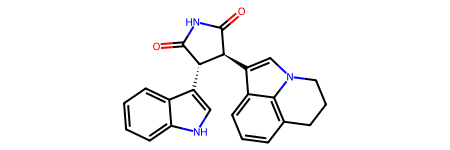

In [12]:
sample_mol = "C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65"
mol = Chem.MolFromSmiles(sample_mol)
#Default
mol


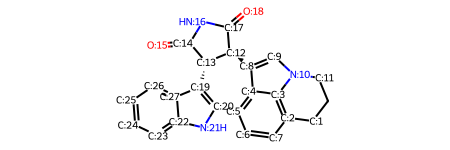

In [13]:
# With atom index
mol_with_atom_index(mol)

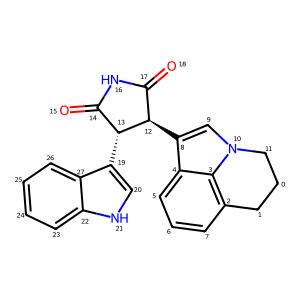

In [14]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300
mol = Chem.MolFromSmiles(sample_mol)
mol

# Include a Calculation

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 250,250

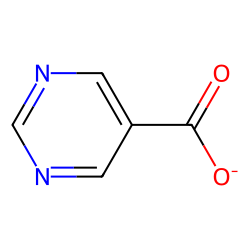

In [2]:
m = Chem.MolFromSmiles('c1ncncc1C(=O)[O-]')
AllChem.ComputeGasteigerCharges(m)
m

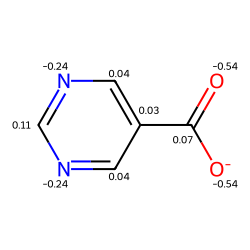

In [3]:
#Draw a molecule with a calculation value displayed (e.g., Gasteiger Charge)
m2 = Chem.Mol(m)
for at in m2.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("_GasteigerCharge"))
    at.SetProp('atomNote',lbl)
m2

# Include Stereo Annotation

In [7]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdCIPLabeler

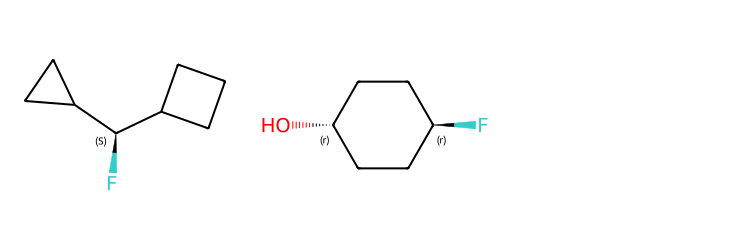

In [8]:
# new stereochemistry code with more accurate CIP labels, 2020.09 release
rdCIPLabeler.AssignCIPLabels(m1)
rdCIPLabeler.AssignCIPLabels(m2)
Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))

# Highlight a Substructure in a Molecule

((3, 4, 5), (8, 9, 7))


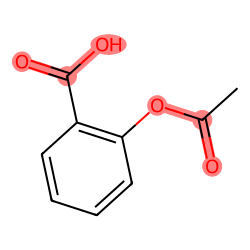

In [9]:
mol = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
print(mol.GetSubstructMatches(substructure))
mol

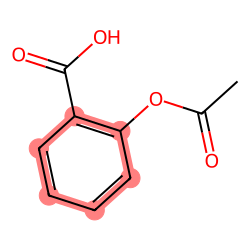

In [11]:
# you can also manually set the atoms that should be highlighted:
mol.__sssAtoms = [0,1,2,6,11,12]
mol

In [12]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import rdDepictor
rdDepictor.SetPreferCoordGen(True)
IPythonConsole.drawOptions.minFontSize=20

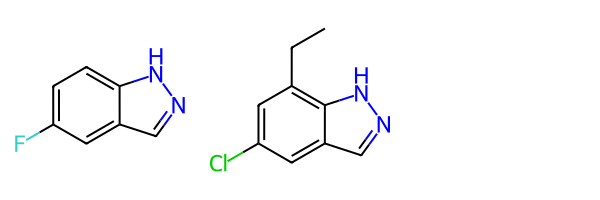

In [13]:
mol1 = Chem.MolFromSmiles('FC1=CC=C2C(=C1)C=NN2')
mol2 = Chem.MolFromSmiles('CCC1=C2NN=CC2=CC(Cl)=C1')
Draw.MolsToGridImage([mol1, mol2])

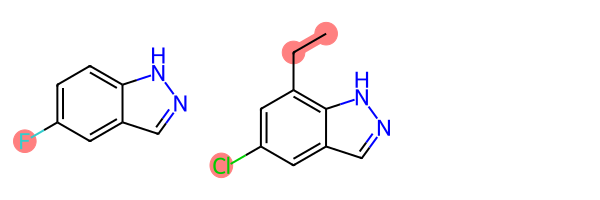

In [14]:
def view_difference(mol1, mol2):
    mcs = rdFMCS.FindMCS([mol1,mol2])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    match1 = mol1.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    for atom in mol1.GetAtoms():
        if atom.GetIdx() not in match1:
            target_atm1.append(atom.GetIdx())
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm2 = []
    for atom in mol2.GetAtoms():
        if atom.GetIdx() not in match2:
            target_atm2.append(atom.GetIdx())
    return Draw.MolsToGridImage([mol1, mol2],highlightAtomLists=[target_atm1, target_atm2])
view_difference(mol1,mol2)

# Highlight Molecule with Multiple Colors

In [15]:
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
import io
from PIL import Image
from collections import defaultdict

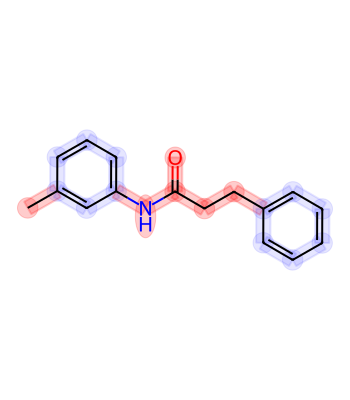

In [16]:
mol = Chem.MolFromSmiles('CC1=CC(=CC=C1)NC(=O)CCC2=CC=CC=C2')
colors = [(0.0, 0.0, 1.0, 0.1), (1.0, 0.0, 0.0, 0.2)]

athighlights = defaultdict(list)
arads = {}
for a in mol.GetAtoms():
    if a.GetIsAromatic():
        aid = a.GetIdx()
        athighlights[aid].append(colors[0])
        arads[aid] = 0.3
    else:
        aid = a.GetIdx()
        athighlights[aid].append(colors[1])
        arads[aid] = 0.3

bndhighlights = defaultdict(list)
for bond in mol.GetBonds():
    aid1 = bond.GetBeginAtomIdx()
    aid2 = bond.GetEndAtomIdx()

    if bond.GetIsAromatic():
        bid = mol.GetBondBetweenAtoms(aid1,aid2).GetIdx()
        bndhighlights[bid].append(colors[0])
    else:
        bid = mol.GetBondBetweenAtoms(aid1,aid2).GetIdx()
        bndhighlights[bid].append(colors[1])

d2d = rdMolDraw2D.MolDraw2DCairo(350,400)
d2d.DrawMoleculeWithHighlights(mol,"",dict(athighlights),dict(bndhighlights),arads,{})
d2d.FinishDrawing()
bio = io.BytesIO(d2d.GetDrawingText())
Image.open(bio)

Without Implicit Hydrogens

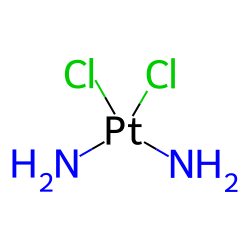

In [17]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
m = Chem.MolFromSmiles('[Pt](Cl)(Cl)(N)N')
m

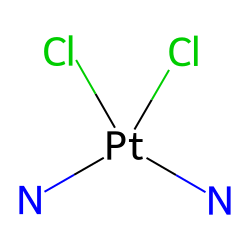

In [18]:
for atom in m.GetAtoms():
    atom.SetProp("atomLabel", atom.GetSymbol())
m

With Abbreviations

In [19]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdAbbreviations

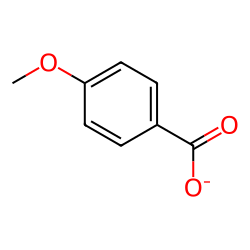

In [20]:
m = Chem.MolFromSmiles('COc1ccc(C(=O)[O-])cc1')
m

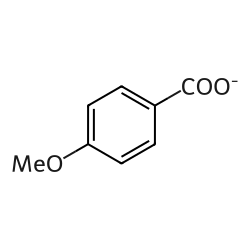

In [21]:
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
nm = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs)
nm

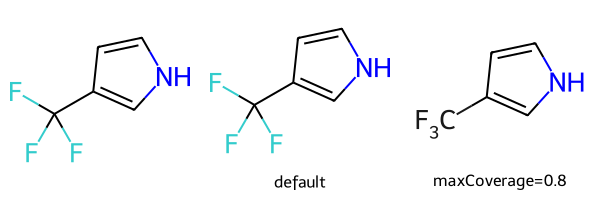

In [22]:
# abbreviations that cover more than 40% of the molecule won't be applied by default
m = Chem.MolFromSmiles('c1c[nH]cc1C(F)(F)F')
nm1 = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs)
nm2 = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs,maxCoverage=0.8)
Draw.MolsToGridImage((m,nm1,nm2),legends=('','default','maxCoverage=0.8'))

In [23]:
# See available abbreviations and their SMILES
# where * is the dummy atom that the group would attach to
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
labels = ["Abbrev", "SMILES"]
line = '--------'

print(f"{labels[0]:<10} {labels[1]}")
print(f"{line:<10} {line}")
for a in abbrevs:
   print(f"{a.label:<10} {Chem.MolToSmiles(a.mol)}")

Abbrev     SMILES
--------   --------
CO2Et      *C(=O)OCC
COOEt      *C(=O)OCC
OiBu       *OCC(C)C
nDec       *CCCCCCCCCC
nNon       *CCCCCCCCC
nOct       *CCCCCCCC
nHept      *CCCCCCC
nHex       *CCCCCC
nPent      *CCCCC
iPent      *C(C)CCC
tBu        *C(C)(C)C
iBu        *C(C)CC
nBu        *CCCC
iPr        *C(C)C
nPr        *CCC
Et         *CC
NCF3       *NC(F)(F)F
CF3        *C(F)(F)F
CCl3       *C(Cl)(Cl)Cl
CN         *C#N
NC         *[N+]#[C-]
N(OH)CH3   *N(C)[OH]
NO2        *[N+](=O)[O-]
NO         *N=O
SO3H       *S(=O)(=O)[OH]
CO2H       *C(=O)[OH]
COOH       *C(=O)[OH]
OEt        *OCC
OAc        *OC(C)=O
NHAc       *NC(C)=O
Ac         *C(C)=O
CHO        *C=O
NMe        *NC
SMe        *SC
OMe        *OC
CO2-       *C(=O)[O-]
COO-       *C(=O)[O-]


Using CoordGen Library

Some molecules like macrocycles are not represented well using the default RDKit drawing code. As a result, it may be preferable to use the CoordGen integration.

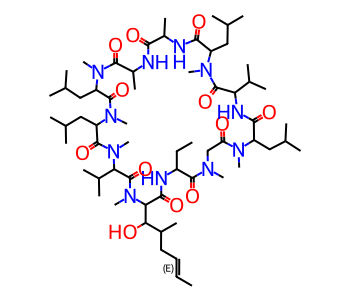

In [26]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 350,300
from rdkit.Chem import Draw
# default drawing
mol = Chem.MolFromSmiles("C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C")
mol

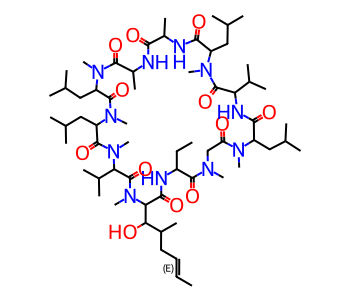

In [25]:
# with CoordGen
from rdkit.Chem import rdCoordGen
rdCoordGen.AddCoords(mol)
mol

On a Plot

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [29]:
x = np.arange(0, 180, 1)
y = np.sin(x)
mol = Chem.MolFromSmiles('C1CNCCC1C(=O)C')
im = Chem.Draw.MolToImage(mol)

(-0.5, 299.5, 299.5, -0.5)

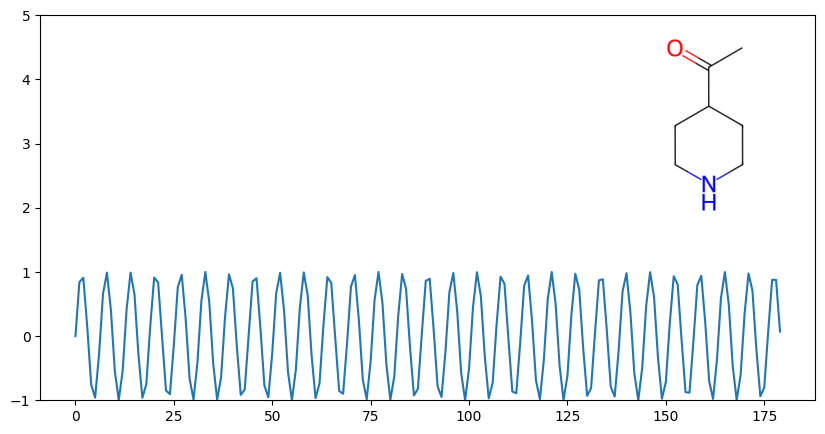

In [30]:
fig = plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.ylim(-1, 5)
ax = plt.axes([0.6, 0.47, 0.38, 0.38], frameon=True)
ax.imshow(im)
ax.axis('off')
# plt.show() # commented out to avoid creating plot with doctest